In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [17]:
# Element Unique Constants
Z = 13
M = 26.981538 * 931368088 #amu to eV

# Experimental Recoil Threshold
T_0 = 50

In [18]:
# Define Constants
G_F = 1.663788*10**(-5) *10**(-18)   # GeV-2 to eV-2
sin_w = 0.231
Q = 8000   #keV
hbar = 6.582119569 * 10**(-22) * 10**(6)   #MeV*s to eV*s
c = 299792458 * 10**2   #m/s to cm/s
k_B = 8.61733 * 10**(-5)  #eV/K

In [19]:
# Calculated Minimum Energy
E_min = 0.5*T_0+0.5*math.sqrt(T_0**2 + 2*T_0*M)
print('Minimum Detectable Energy: ' + str(E_min) + ' eV')

Minimum Detectable Energy: 792643.1849314232 eV


In [20]:
# Create Cross Section Function
def XS(N, M, E):
    Q_W = N-(1-4*sin_w)*Z
    const_term = G_F**2 * Q_W**2 /(4*math.pi) * (hbar*c)**2 
    T_max = E/(1+M/(2*E))
    sigma = const_term * E**2 * (1-T_0/T_max)**2
    return sigma

In [21]:
# Make Energy Spectrum
energies = []   # in eV
for i in range(int(E_min*10**(-3))+1, int(Q)+1) :
    energies.append(i*10**(3))

In [22]:
# Isotope 64
prob_64 = 1
N_64 = 14
M_64 = M
xs_tot = []

In [23]:
# Calculate Isotope Cross Sections
for e in energies :
    xs_tot.append(XS(N_64, M_64, e))

In [24]:
kev = []
for e in energies :
    kev.append(e*10**(-3))

<function matplotlib.pyplot.show(close=None, block=None)>

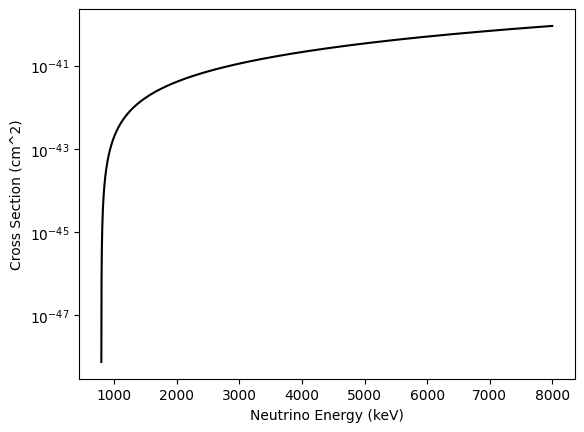

In [25]:
plt.plot(kev, xs_tot, color='black')
plt.xlabel('Neutrino Energy (keV)')
plt.ylabel('Cross Section (cm^2)')
plt.yscale('log')
plt.savefig('aluminum_xs.png')
plt.show

In [26]:
# Download Data
csv_file = 'aluminum_xs_exp.csv'
with open(csv_file, 'w', newline='') as file:
    fieldnames = ['energy', 'xs']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(energies)) :
        writer.writerow({'energy': energies[i], 'xs': xs_tot[i]})